In [213]:
import SimpleITK as sitk
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [6]:
T2 = "/proj/NIRAL/users/siyangj/myData/min_normal/T2/1.nrrd"
sg = "/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/1.nrrd"


In [227]:
t1 = time.time()
m1 = sitk.ReadImage(T2)
m2 = sitk.ReadImage(sg)
t2 = time.time()
t2 - t1

0.010429859161376953

In [12]:
def myShow(im,axis=0,idx=60):
    arr = sitk.GetArrayFromImage(im)
    if axis==0:
        plt.imshow(arr[idx,:,:])
    elif axis==1:
        plt.imshow(arr[:,idx,:])
    else:
        plt.imshow(arr[:,:,idx])

In [ ]:
def

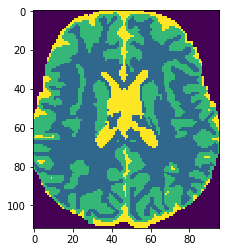

In [15]:
myShow(m2)

In [230]:
m1.SetOrigin()

TypeError: SetOrigin() missing 1 required positional argument: 'origin'

In [104]:
mi = sitk.GetImageFromArray(sitk.GetArrayFromImage(m1))

In [238]:
int(' 6 \n')

6

In [150]:
rot = sitk.VersorRigid3DTransform([0.,0.,1.],-np.pi/10)
rot.SetCenter([60.,71.,66.])

In [198]:
rot.GetVersor()

(-0.0, -0.0, -0.15643446504023087, 0.9876883405951378)

In [229]:
t1 = time.time()
eu3 = sitk.Euler3DTransform()
eu3.SetRotation(np.pi/20,np.pi/20,np.pi/20)
eu3.SetCenter([60.,71.,66.])
t2 = time.time()
t2-t1

0.0002460479736328125

In [216]:
t1

'Sun Feb 17 18:00:05 2019'

In [118]:
scl = sitk.ScaleTransform(3,[1.1,1.1,1.1])
scl.SetCenter([60.,71.,66.])

In [130]:
tsl = sitk.TranslationTransform(3)
tsl.SetOffset([10,10,10])

In [239]:
m1.GetDimension()

3

In [220]:
t1 = time.time()
num_cpt = 5
d_sigma = 5

trans_from_domain_mesh_size = [num_cpt] * m1.GetDimension()
bsp = sitk.BSplineTransformInitializer(m1, trans_from_domain_mesh_size)

params = bsp.GetParameters()
params_numpy = np.asarray(params, dtype=float)
params_numpy = params_numpy + np.random.randn(
    params_numpy.shape[0]) * d_sigma

params = tuple(params_numpy)
bsp.SetParameters(params)
t2 = time.time()
t2-t1

0.0011365413665771484

In [250]:
cmp = sitk.Transform(3, sitk.sitkComposite)
cmp.AddTransform(bsp)
cmp.AddTransform(scl)
cmp.AddTransform(eu3)
#cmp.AddTransform(tsl)


In [ ]:
t1 = time.time()
resampler = sitk.ResampleImageFilter()
#resampler.SetInterpolator(sitk.sitkBSpline)
resampler.SetInterpolator(sitk.sitkNearestNeighbor)
resampler.SetReferenceImage(m1)
resampler.SetDefaultPixelValue(0)
resampler.SetTransform(cmp)#bsp)#scl)#rot)

In [221]:
t1 = time.time()
out_img_sitk = resampler.Execute(m2)
t2 = time.time()
t2-t1

2.4984426498413086

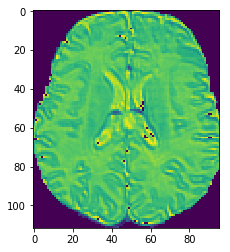

In [255]:
myShow(sitk.Flip(m1,[True,False,False]))

In [245]:
help(sitk.Flip)

Help on function Flip in module SimpleITK.SimpleITK:

Flip(*args, **kwargs)
    Flip(Image image1, VectorBool flipAxes, bool flipAboutOrigin=False) -> Image
    
    
    
    Flips an image across user specified axes.
    
    
    This function directly calls the execute method of FlipImageFilter in order to support a procedural API
    
    
    See:
     itk::simple::FlipImageFilter for the object oriented interface



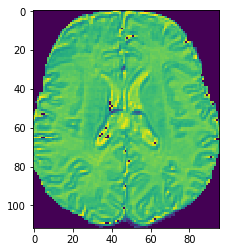

In [242]:
myShow(m1)

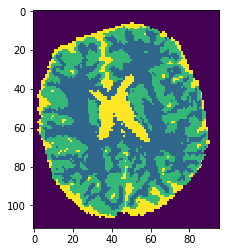

In [212]:
myShow(out_img_sitk,axis=0)

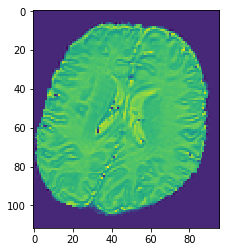

In [180]:
myShow(out_img_sitk,axis=0)

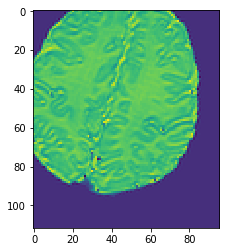

In [156]:
myShow(out_img_sitk,axis=0)

In [103]:
out_img_sitk.GetSize()

(96, 112, 96)

In [80]:
resampler.SetTransform(rot)
out_img_sitk = resampler.Execute(m1)

In [28]:
out_arr = sitk.GetArrayFromImage(out_img_sitk)

In [30]:
np.where(out_arr>0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [75]:
rot.SetCenter([60,71,66])

In [59]:
resampler.GetTransform()

<SimpleITK.SimpleITK.Transform; proxy of <Swig Object of type 'itk::simple::Transform *' at 0x7f78c47b2990> >

In [54]:
m1.GetOrigin()

(12.0, 15.0, 18.0)